In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("flipkart_product.csv", encoding='ISO-8859-1')

In [3]:
df

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product
...,...,...,...,...,...
189869,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Thanks
189870,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Terrific,Good
189871,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,5,Just wow!,Super
189872,"NIVEA Soft Light Moisturizer for Face, Hand & ...",â¹142,4,Worth the money,Good


In [4]:
df.head()

,ProductName,Price,Rate,Review,Summary
0,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Super!,Great cooler.. excellent air flow and for this...
1,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",5,Awesome,Best budget 2 fit cooler. Nice cooling
2,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,The quality is good but the power of air is de...
3,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",1,Useless product,Very bad product it's a only a fan
4,Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...,"??3,999",3,Fair,Ok ok product


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ProductName  189874 non-null  object
 1   Price        189873 non-null  object
 2   Rate         189873 non-null  object
 3   Review       189870 non-null  object
 4   Summary      189860 non-null  object
dtypes: object(5)
memory usage: 7.2+ MB


In [6]:
df.isnull().sum()

ProductName     0
Price           1
Rate            1
Review          4
Summary        14
dtype: int64

In [7]:
df.describe()

,ProductName,Price,Rate,Review,Summary
count,189874,189873,189873,189870,189860
unique,812,561,9,1264,98343
top,MILTON Thermosteel Flip Lid 500 ml FlaskÂ Â (P...,"â¹1,299",5,Nan,Good
freq,9278,10005,108694,20862,14175


In [8]:
df.shape

(189874, 5)

In [9]:
df.columns

Index(['ProductName', 'Price', 'Rate', 'Review', 'Summary'], dtype='object')

In [10]:
df = df.dropna(subset = ['Review'])

In [14]:
# Convert 'Rate' to numeric, invalid values will become NaN
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Drop rows where Rate is NaN
df = df.dropna(subset=['Rate'])

# Create binary labels: 1 for positive review (Rate >= 3), 0 otherwise
labels = (df['Rate'] >= 3).astype(int)
texts = df['Review'].astype(str)

In [15]:
print(labels.head())

0    1
1    1
2    1
3    0
4    1
Name: Rate, dtype: int32


In [16]:
tokenizer = Tokenizer(num_words = 1000, oov_token ="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [17]:
maxlen = 200
padded_sequences = pad_sequences(sequences, maxlen= maxlen)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [19]:
model = Sequential([
    Embedding(input_dim=10000,output_dim = 128, input_length = maxlen),
    LSTM(64, dropout= 0.2, recurrent_dropout = 0.2),
    Dense(1, activation = "sigmoid")
]) 

D:\Users\shrey\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
model.compile(optimizer='adam', loss ='binary_crossentropy', metrics = ['accuracy'])
            

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 173s 90ms/step - accuracy: 0.9569 - loss: 0.1196 - val_accuracy: 0.9764 - val_loss: 0.0654
Epoch 2/5
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 230s 121ms/step - accuracy: 0.9779 - loss: 0.0628 - val_accuracy: 0.9764 - val_loss: 0.0647
Epoch 3/5
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 271s 143ms/step - accuracy: 0.9781 - loss: 0.0609 - val_accuracy: 0.9764 - val_loss: 0.0655
Epoch 4/5
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 221s 116ms/step - accuracy: 0.9786 - loss: 0.0598 - val_accuracy: 0.9765 - val_loss: 0.0648
Epoch 5/5
1899/1899 ━━━━━━━━━━━━━━━━━━━━ 229s 120ms/step - accuracy: 0.9786 - loss: 0.0598 - val_accuracy: 0.9764 - val_loss: 0.0647


In [26]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1187/1187 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.9802 - loss: 0.0573
Test Accuracy: 98.02%


In [27]:
y_pred_prob = model.predict(x_test)

1187/1187 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step


In [28]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

In [30]:
print("Classification report:", classification_report(y_test, y_pred))

Classification report:               precision    recall  f1-score   support

           0       1.00      0.86      0.92      5134
           1       0.98      1.00      0.99     32840

    accuracy                           0.98     37974
   macro avg       0.99      0.93      0.96     37974
weighted avg       0.98      0.98      0.98     37974



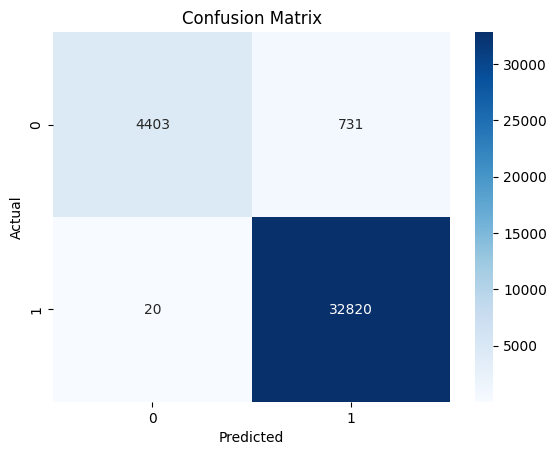

In [33]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


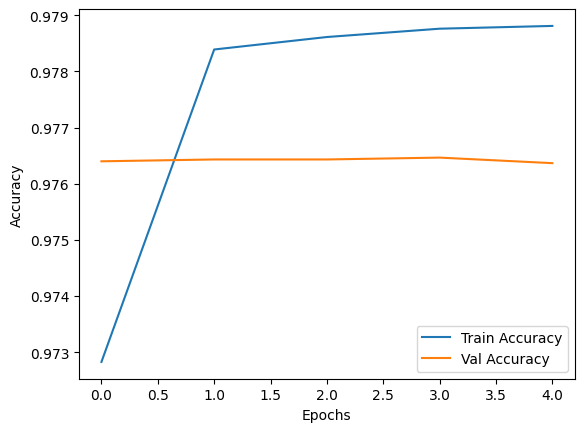

In [34]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
def predict_sentiment():
    user_input = input("Enter a product review: ")
    seq = tokenizer.texts_to_sequences([user_input])
    padded = pad_sequences(seq, maxlen=maxlen)
    pred = model.predict(padded)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred:.2f})")

# Run prediction
predict_sentiment()

Enter a product review: super movie
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Sentiment: Positive 😊 (Confidence: 1.00)
